# Import Libaries

In [3]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 17.9 MB 20.0 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 103.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 76.7 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=390938 sha256=8cb63a574c746c7625918cd19444e2a0cd582c35cbeb8801d9fc48318fb2df63
  Stored in directory: /tmp/pip-ephem-wheel-cache-twrxr658/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=685db2481acf605d72014fdea0381a16aef10f85e1fe8097a53b07b97e1e9bc9
  Stored in directory: /root/.cac

In [4]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

<ipython-input-4-c03a24be5f20>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [5]:
df=pd.read_csv('winemag-data_first150k.csv',sep=';',encoding='latin-1')
profile=ProfileReport(df,title='Pandas Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.isnull().sum()

,0
country,2
designation,43826
points,5
price,13396
province,7
region_1,23845
region_2,85659
variety,5
winery,5
last_year_points,0


# Imputation

In [8]:
new_df=df.copy()
new_df['price'].fillna(new_df['price'].mean(),inplace=True)
new_df.isnull().sum()

<ipython-input-8-b3088d7cfa38>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df['price'].fillna(new_df['price'].mean(),inplace=True)


,0
country,2
designation,43826
points,5
price,0
province,7
region_1,23845
region_2,85659
variety,5
winery,5
last_year_points,0


In [9]:
df.isnull().mean()

,0
country,0.000014
designation,0.304269
points,0.000035
price,0.093004
province,0.000049
region_1,0.165548
region_2,0.594701
variety,0.000035
winery,0.000035
last_year_points,0.000000


In [10]:
threshold=0.5
new_df=df[df.columns[df.isnull().mean()<threshold]]

In [11]:
new_df.isnull().mean()

,0
country,0.000014
designation,0.304269
points,0.000035
price,0.093004
province,0.000049
region_1,0.165548
variety,0.000035
winery,0.000035
last_year_points,0.000000


In [12]:
print(df.shape)
new_df=df.loc[df.isnull().mean(axis=1)<threshold]
print(new_df.shape)

(144037, 10)
(144032, 10)


In [13]:
new_df.isnull().sum()

,0
country,2
designation,43821
points,0
price,13391
province,2
region_1,23840
region_2,85654
variety,0
winery,0
last_year_points,0


In [15]:
print(df.select_dtypes(include=np.number).median())
new_df=df.fillna(df.select_dtypes(include=np.number).median())

points              88.0
price               24.0
last_year_points    90.0
dtype: float64


In [16]:
new_df.isnull().sum()

,0
country,2
designation,43826
points,0
price,0
province,7
region_1,23845
region_2,85659
variety,5
winery,5
last_year_points,0


In [17]:
new_df=df.fillna(0)
new_df.isnull().sum()

,0
country,0
designation,0
points,0
price,0
province,0
region_1,0
region_2,0
variety,0
winery,0
last_year_points,0


In [18]:
print(df.shape)
new_df=df.dropna(how='any')
print(new_df.shape)

(144037, 10)
(37576, 10)


# HANDING OUTLIERS

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

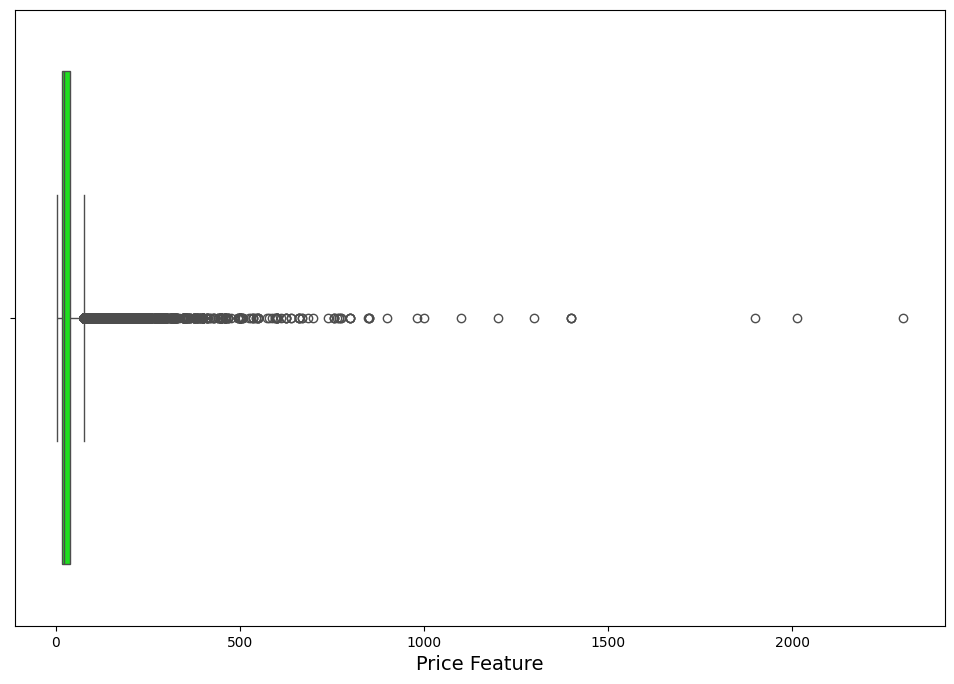

In [22]:
fig=plt.figure(figsize=(12,8))
sns.boxplot(x=df['price'],color='lime')
plt.xlabel('Price Feature', fontsize=14)
plt.savefig('boxplot.png',dpi=300)

In [23]:
df['price'].describe()

,price
count,130641.000000
mean,33.123399
std,36.368177
min,4.000000
25%,16.000000
50%,24.000000
75%,40.000000
max,2300.000000


# DROP OUTLIER ด้วย STANDARD DEVIATION

In [25]:
print(df.shape)
factor = 3
upper_lim = df['price'].mean () + df['price'].std () * factor
lower_lim = df['price'].mean () - df['price'].std () * factor
drop_outlier1 = df[(df['price'] < upper_lim)&(df['price'] > lower_lim)]
print(drop_outlier1.shape)

(144037, 10)
(129047, 10)


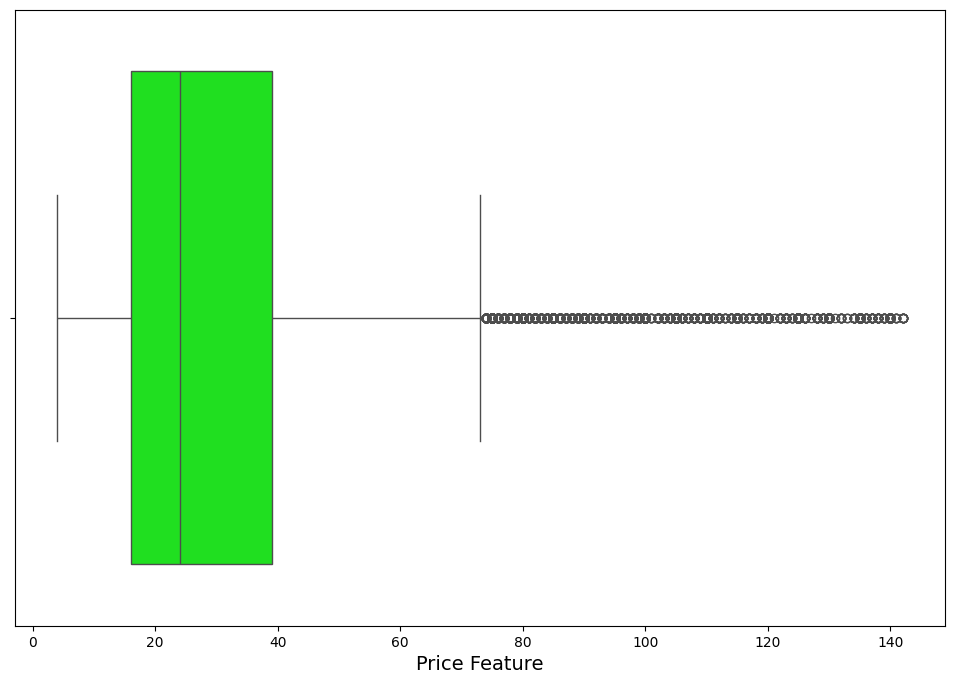

In [26]:
fig=plt.figure(figsize=(12,8))
sns.boxplot(x=drop_outlier1['price'],color='lime')
plt.xlabel('Price Feature', fontsize=14)
plt.savefig('boxplot.png',dpi=300)

In [27]:
drop_outlier1['price'].describe()

,price
count,129047.000000
mean,30.477283
std,21.342490
min,4.000000
25%,16.000000
50%,24.000000
75%,39.000000
max,142.000000


In [30]:
print(df.shape)
upper_lim = df['price'].quantile(.95)
lower_lim = df['price'].quantile(.05)
drop_outlier2 = df[(df['price'] < upper_lim)&(df['price'] > lower_lim)]
drop_outlier2.shape

(144037, 10)


(113852, 10)

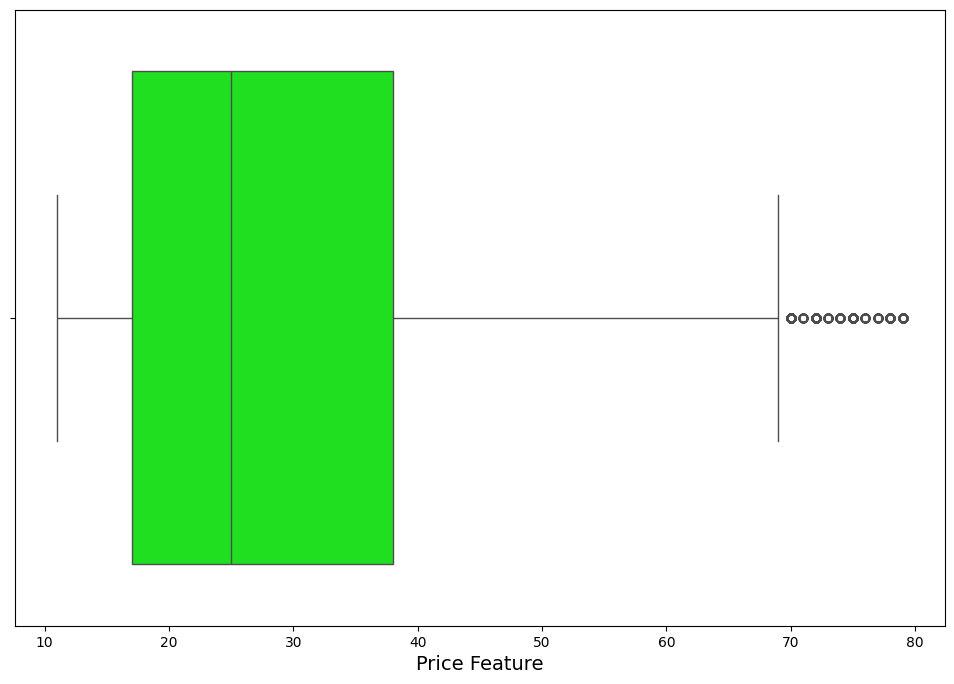

In [31]:
fig=plt.figure(figsize=(12,8))
sns.boxplot(x=drop_outlier2['price'],color='lime')
plt.xlabel('Price Feature', fontsize=14)
plt.savefig('boxplot.png',dpi=300)

In [32]:
drop_outlier2['price'].describe()

,price
count,113852.000000
mean,29.101781
std,15.492622
min,11.000000
25%,17.000000
50%,25.000000
75%,38.000000
max,79.000000


In [33]:
labels=['low','medium','high']
bins=[0.,20.,40.,100.]
drop_outlier2['price_cat']=pd.cut(drop_outlier2['price'],bins=bins,labels=labels,include_lowest=False)
drop_outlier2.sample(n=5).head()

<ipython-input-33-5980276588d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_outlier2['price_cat']=pd.cut(drop_outlier2['price'],bins=bins,labels=labels,include_lowest=False)


,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points,price_cat
30697,US,Rose Rock West Vineyards,91.0,40.0,Oregon,Eola-Amity Hills,Willamette Valley,Chardonnay,Roco,96,medium
115398,US,Brut Prestige,92.0,20.0,California,Napa Valley,Napa,Sparkling Blend,Mumm Napa,89,low
71908,Portugal,S,93.0,35.0,Alentejano,NaN,NaN,Syrah,Herdade do EsporÃ£o,96,medium
81282,Italy,Cresasso,91.0,60.0,Veneto,Veronese,NaN,Corvina,Zenato,90,high
130876,US,Ingrid's Vineyard,90.0,45.0,California,Carmel Valley,Central Coast,Chardonnay,Bernardus,80,high


# LOG TRANSFORM

In [34]:
drop_outlier2['log']=(drop_outlier2['price']).transform(np.log)
drop_outlier2.sample(n=5).head()

<ipython-input-34-9ca9cda202e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_outlier2['log']=(drop_outlier2['price']).transform(np.log)


,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points,price_cat,log
65163,France,HÃ©ritage,87.0,30.0,Burgundy,Mercurey,NaN,Pinot Noir,Antonin Rodet,84,medium,3.401197
29018,France,Tradition,88.0,17.0,Alsace,Alsace,NaN,Riesling,Kuentz-Bas,85,low,2.833213
68551,Spain,Extra Rich,88.0,30.0,Andalucia,Jerez,NaN,Pedro XimÃ©nez,Pedro Romero,80,medium,3.401197
120727,France,RÃ©serve MillÃ©simÃ©e Brut,93.0,75.0,Champagne,Champagne,NaN,Champagne Blend,Philipponnat,100,high,4.317488
56802,Italy,NaN,88.0,19.0,Southern Italy,Fiano di Avellino,NaN,Fiano,D'Antiche Terre,87,low,2.944439


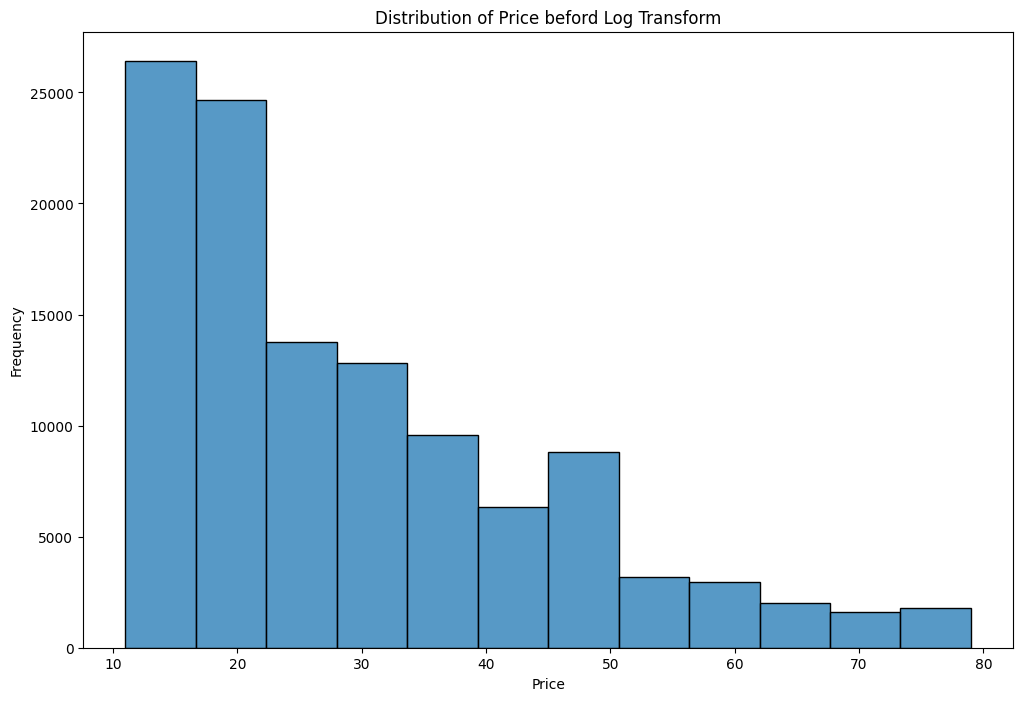

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(drop_outlier2['price'],bins=12,kde=False)
plt.title('Distribution of Price beford Log Transform')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<ipython-input-36-4ab6e069813d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_outlier2['log']=drop_outlier2['price'].transform(np.log)


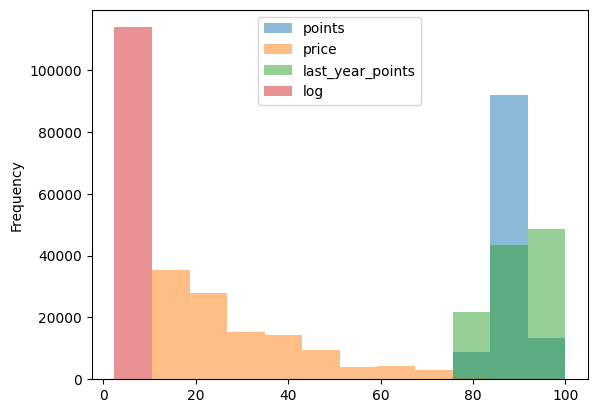

In [36]:
drop_outlier2['log']=drop_outlier2['price'].transform(np.log)
ax=drop_outlier2.plot.hist(bins=12,alpha=0.5)
ax.figure.savefig('hist.png',dpi=300)

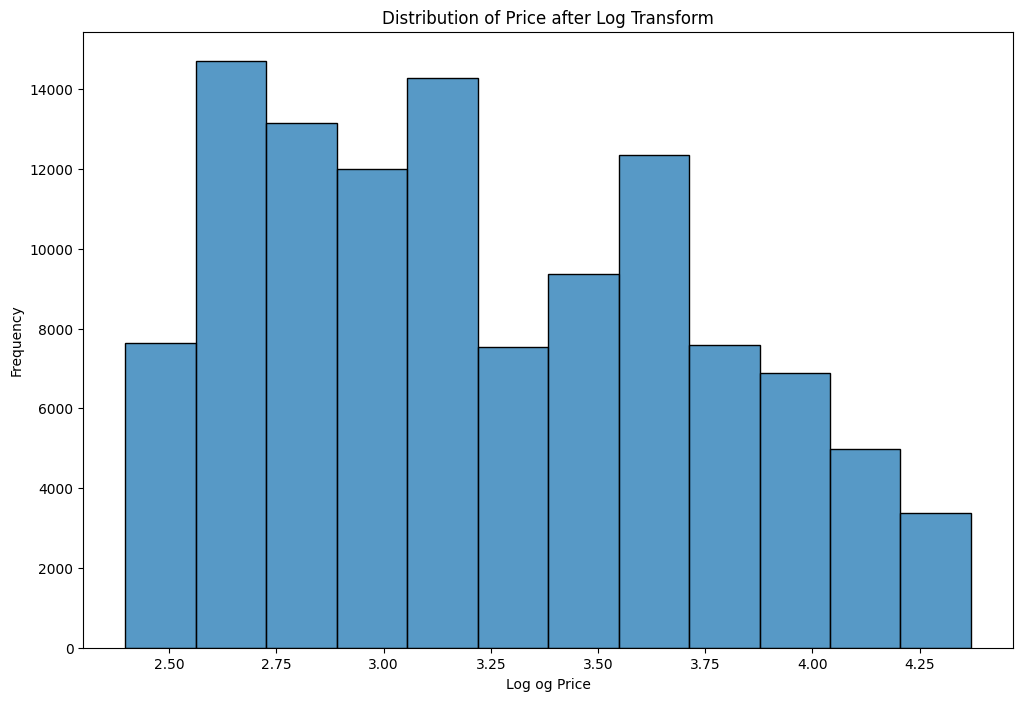

In [37]:
plt.figure(figsize=(12,8))
sns.histplot(drop_outlier2['log'],bins=12,kde=False)
plt.title('Distribution of Price after Log Transform')
plt.xlabel('Log og Price')
plt.ylabel('Frequency')
plt.show()

In [38]:
drop_outlier2.sample(n=5).head()

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points,price_cat,log
130663,US,NaN,90.0,42.0,California,Yountville,Napa,Syrah,Rocca,83,high,3.737670
45904,US,Hendry Ranch,88.0,20.0,California,Napa Valley,Napa,AlbariÃ±o,Hendry,97,low,2.995732
8744,France,La Reine des Bois,93.0,43.0,RhÃ´ne Valley,Lirac,NaN,RhÃ´ne-style Red Blend,Domaine de la MordorÃ©e,88,high,3.761200
86879,US,NaN,86.0,21.0,California,Carneros,Napa-Sonoma,Merlot,Buena Vista,98,medium,3.044522
8031,France,NaN,86.0,25.0,Loire Valley,Quincy,NaN,Sauvignon Blanc,Jean-Michel Sorbe,83,medium,3.218876


# ONE HOT ENCODING

In [39]:
encoded_coloms=pd.get_dummies(drop_outlier2['price_cat'])
drop_outlier2=drop_outlier2.join(encoded_coloms)
drop_outlier2.sample(n=5).head()

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points,price_cat,log,low,medium,high
78668,Chile,Cordillera Reserva Privada Barrel Fermented,82.0,17.0,Chile,NaN,NaN,Chardonnay-Viognier,Miguel Torres,92,low,2.833213,True,False,False
42776,Austria,NaN,88.0,20.0,Carnuntum,NaN,NaN,Sauvignon Blanc,Glatzer,94,low,2.995732,True,False,False
32274,France,Bourricot,85.0,11.0,France Other,Vin de France,NaN,Chardonnay,L. Tramier & Fils,88,low,2.397895,True,False,False
131525,Italy,NaN,88.0,21.0,Piedmont,Langhe,NaN,Arneis,Il Falchetto,93,medium,3.044522,False,True,False
54994,Austria,BlaufrÃ¤nkisch Cabernet,88.0,24.0,Burgenland,NaN,NaN,Red Blend,Gunter Triebaumer,100,medium,3.178054,False,True,False
